In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('spam.csv')

In [9]:
df.shape

(5572, 2)

In [10]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing

In [11]:
# Convert 'spam' and 'ham' to binary labels
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

# Split the data into features (X) and target (Y)
X = df["Message"]
Y = df["Category"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=3)

# Optionally, you can check the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 3621
Test set size: 1951


In [12]:
# Find duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
      Category                                            Message
103          1  As per your request 'Melle Melle (Oru Minnamin...
154          1  As per your request 'Melle Melle (Oru Minnamin...
207          1  As I entered my cabin my PA said, '' Happy B'd...
223          1                             Sorry, I'll call later
326          1                   No calls..messages..missed calls
...        ...                                                ...
5524         0  You are awarded a SiPix Digital Camera! call 0...
5535         1  I know you are thinkin malaria. But relax, chi...
5539         1                         Just sleeping..and surfing
5553         1                        Hahaha..use your brain dear
5558         1                             Sorry, I'll call later

[415 rows x 2 columns]


In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Print the count of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Category    0
Message     0
dtype: int64


Feature Extraction - TF-IDF

In [14]:
# TF-IDF feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

### Model Training

In [15]:
# Model training
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

### Model Evaluation

In [16]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.3545981772991 %
Accuracy on test data: 95.89953869810354 %


### Confusion Matrix Visualization

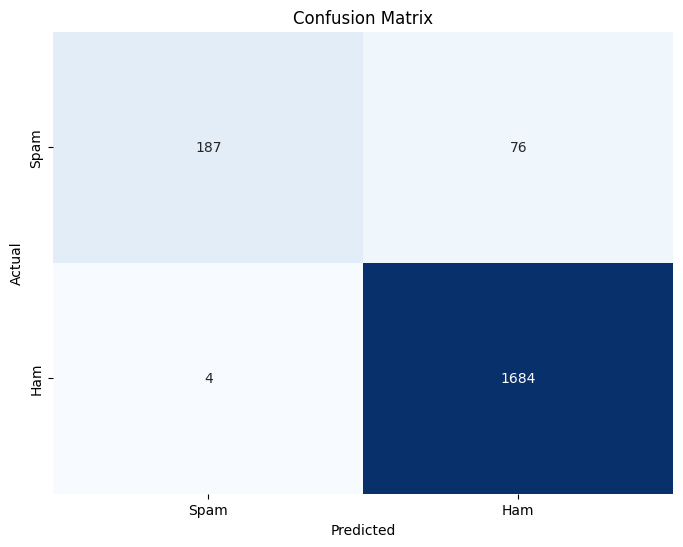

In [17]:
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Calculating and Displaying Error Metrics

In [18]:
# Classification report
classification_rep = classification_report(Y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.71      0.82       263
         Ham       0.96      1.00      0.98      1688

    accuracy                           0.96      1951
   macro avg       0.97      0.85      0.90      1951
weighted avg       0.96      0.96      0.96      1951



In [19]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.9589953869810354
Precision :  0.9568181818181818
Recall :  0.9976303317535545
Specificity :  0.7110266159695817


### Make Predictions on New Input

In [20]:
# Make predictions on new input
#Spam i/p: BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
#Ham i/p: Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life
input_your_mail ="Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


### save the trained model as a pickle file

In [23]:
import pickle

# Save the model to a pickle file
with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer (TF-IDF) to a pickle file
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(feature_extraction, vectorizer_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


### load the model and vectorizer in your Streamlit app

In [22]:
import pickle

# Load the saved model
with open('spam_classifier_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the saved vectorizer
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    feature_extraction = pickle.load(vectorizer_file)

print("Model and vectorizer loaded successfully!")


Model and vectorizer loaded successfully!
